#### [Data set here :](https://drive.google.com/file/d/1e4zJx1QYtCWCCd8msEoqi9Of4NGk4LqY/view?usp=sharing)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import  DummyClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc



About Dataset

1. Favorite Color: Favorite color (colors reported by respondents were mapped to either warm, cool or neutral).
    
2. Favorite Music Genr: Favorite broad music genre.
    
3. Favorite Beverage: Favorite alcoholic drink.
    
4. Favorite Soft Drink: Favorite fizzy drink
    
5. Gender: Binary gender as reported by the respondents
    
Goal:
    
✓ Predict Gender

Task:
    
1. EDA

2. Preprocessing

3. Implement suitable machine learning algorithm with data


# EDA

In [2]:
df = pd.read_csv('Data.csv')
df.head(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
7,Warm,Pop,Whiskey,Fanta,F
8,Warm,Rock,Other,7UP/Sprite,F
9,Neutral,Pop,Wine,Coca Cola/Pepsi,F


In [3]:
df.shape

(66, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [6]:
cols = df.columns
for col in cols:
    print(col, ':')
    print(set(df[col].values))
    print("\n----------------------------\n")

Favorite Color :
{'Cool', 'Neutral', 'Warm'}

----------------------------

Favorite Music Genre :
{'R&B and soul', 'Pop', 'Hip hop', 'Folk/Traditional', 'Electronic', 'Jazz/Blues', 'Rock'}

----------------------------

Favorite Beverage :
{'Whiskey', 'Vodka', 'Wine', 'Other', 'Beer', "Doesn't drink"}

----------------------------

Favorite Soft Drink :
{'7UP/Sprite', 'Coca Cola/Pepsi', 'Other', 'Fanta'}

----------------------------

Gender :
{'F', 'M'}

----------------------------



C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

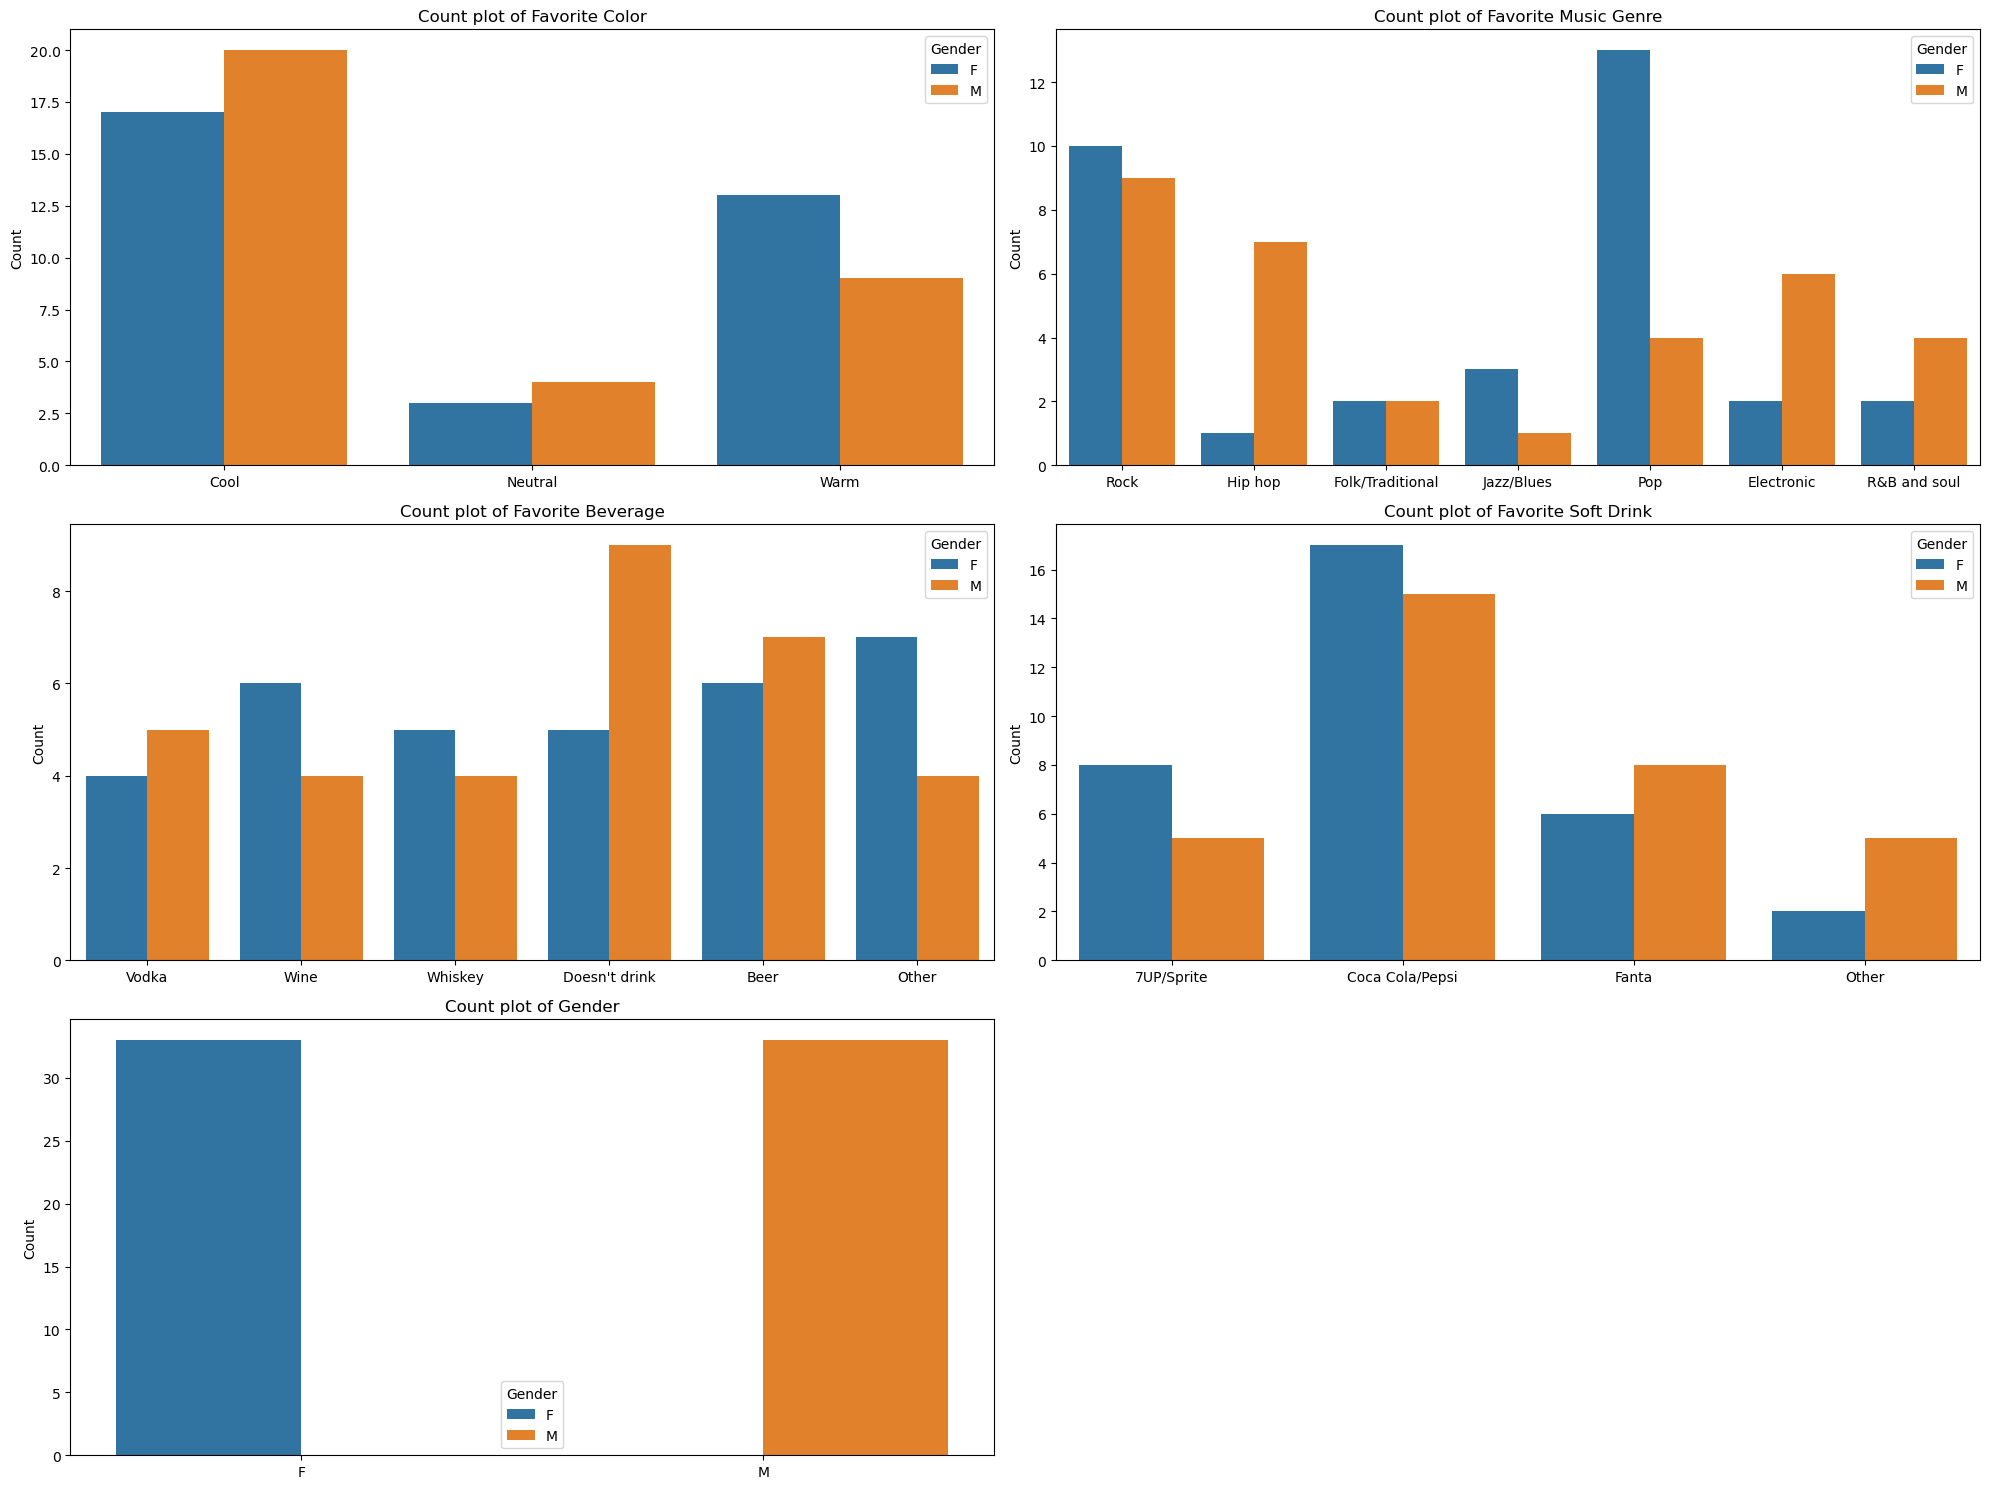

In [7]:

columns = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']

num_cols = 2  
num_rows = (len(df.columns)+1)//2 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

# Flatten axes if necessary
axes = axes.flatten()

# Plot count plots for each column
for i, column in enumerate(df):
    ax = axes[i]
    sns.countplot(x=column, hue = 'Gender',data=df, ax=ax)
    ax.set_title(f'Count plot of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.tight_layout()
plt.show()

# Data preprocessing

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# one hot encoding for categorical data
cols = list(df.drop(columns = 'Gender'))
df = pd.get_dummies(df, columns=cols)

In [10]:
# split data to train and test
X = df.drop(columns = 'Gender')
y = df['Gender']
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (52, 20)
y_train shape: (52,)
X_test shape: (14, 20)
y_test shape: (14,)


# ML model

In [11]:
knn_model = make_pipeline(
    SimpleImputer(strategy = 'mean'),
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=11,metric="manhattan")
    
)
knn_model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=11))])

### Model evaluation

In [12]:
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [13]:


# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Evaluation metrics")
print("-----------------------------------------")
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}% \n")

# Calculate precision
precision = precision_score(y_test, y_test_pred, pos_label='M')
print("-----------------------------------------")
print(f"Precision:{precision:.2f}\n")

# Calculate recall
recall = recall_score(y_test, y_test_pred, pos_label='M')
print("-----------------------------------------")
print(f"Recall:{recall:.2f}\n")

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred, pos_label='M')
print("-----------------------------------------")
print(f"F1-score:{f1:.2f}\n")


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("-----------------------------------------")
print("Confusion Matrix:")
print(conf_matrix)

# classification report
report = classification_report(y_test, y_test_pred)
print("\n-----------------------------------------")
print("Classification Report:")
print(report)

Evaluation metrics
-----------------------------------------
Train Accuracy: 59.62%
Test Accuracy: 50.00% 

-----------------------------------------
Precision:0.50

-----------------------------------------
Recall:0.43

-----------------------------------------
F1-score:0.46

-----------------------------------------
Confusion Matrix:
[[4 3]
 [4 3]]

-----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           F       0.50      0.57      0.53         7
           M       0.50      0.43      0.46         7

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.50        14
weighted avg       0.50      0.50      0.50        14



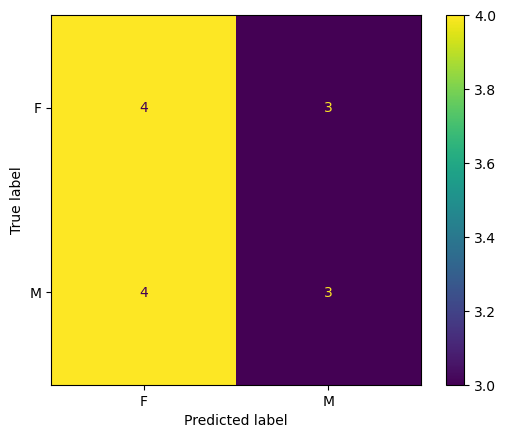

In [14]:
ConfusionMatrixDisplay.from_estimator(knn_model,X_test,y_test)

In [15]:
train_errors = []
val_errors = []

for k in tqdm(range(1, 20)):
    knn_model.n_neighbors = k
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    y_val_pred = knn_model.predict(X_test)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    val_errors.append(1 - accuracy_score(y_test, y_val_pred))

100%|██████████| 19/19 [00:02<00:00,  8.29it/s]


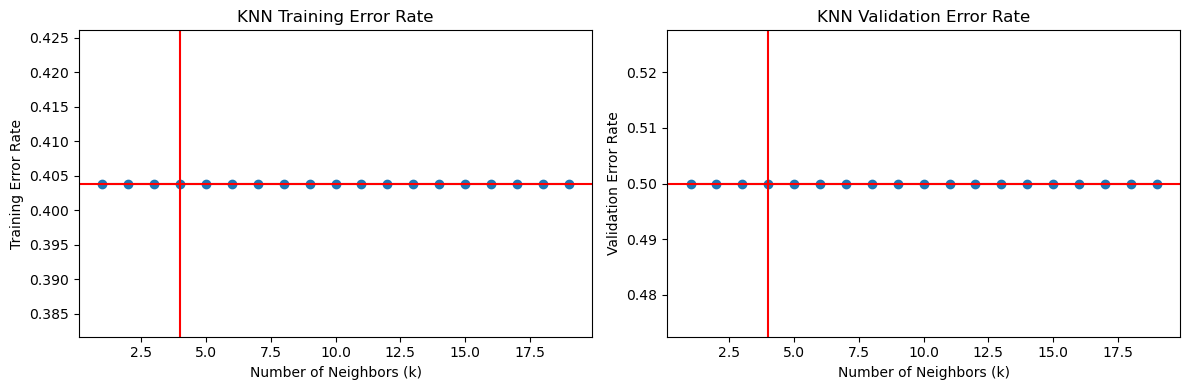

In [16]:
plt.figure(figsize=(12, 4))

# Plot the training error rate curve
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_errors)+1), train_errors, marker='o')
plt.axhline(y=train_errors[3], c='red')
plt.axvline(x=4, c='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Training Error Rate')
plt.title('KNN Training Error Rate')

# Plot the validation error rate curve
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_errors)+1), val_errors, marker='o')
plt.axhline(y=val_errors[3], c='red')
plt.axvline(x=4, c='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Error Rate')
plt.title('KNN Validation Error Rate')

plt.tight_layout()


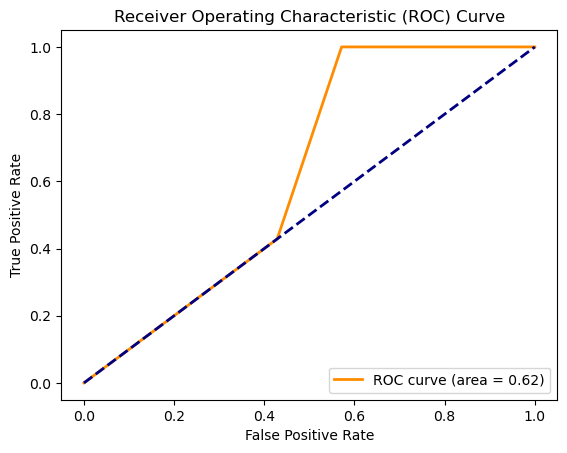

In [17]:
# Plot ROC curve
y_probs = knn_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
y_test_binary = y_test.map({'F': 0, 'M': 1})
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

